In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandas.api.types import CategoricalDtype

%matplotlib inline

In [4]:
# Loading Data

march19 = pd.read_csv(r"..\Data 2019\201903-capitalbikeshare-tripdata.csv")
march20 = pd.read_csv(r"..\Impact_Covid\202003-capitalbikeshare-tripdata.csv")

In [3]:
#Data has same columns and features, proceed to concatenation

march19.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,896,2019-03-01 00:02:23,2019-03-01 00:17:19,31234,20th & O St NW / Dupont South,31306,39th & Calvert St NW / Stoddert,W01259,Member
1,613,2019-03-01 00:03:10,2019-03-01 00:13:23,31323,Woodley Park Metro / Calvert St & Connecticut ...,31214,17th & Corcoran St NW,W22263,Member
2,652,2019-03-01 00:04:14,2019-03-01 00:15:06,31651,11th & Park Rd NW,31506,1st & Rhode Island Ave NW,W00825,Member
3,676,2019-03-01 00:05:11,2019-03-01 00:16:27,31400,Georgia & New Hampshire Ave NW,31212,21st & M St NW,W24162,Member
4,587,2019-03-01 00:08:04,2019-03-01 00:17:51,31293,31st & Water St NW,31250,20th & L St NW,W21644,Member


In [5]:
march20.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [6]:
march= pd.concat([march19, march20])
march.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,896,2019-03-01 00:02:23,2019-03-01 00:17:19,31234,20th & O St NW / Dupont South,31306,39th & Calvert St NW / Stoddert,W01259,Member
1,613,2019-03-01 00:03:10,2019-03-01 00:13:23,31323,Woodley Park Metro / Calvert St & Connecticut ...,31214,17th & Corcoran St NW,W22263,Member
2,652,2019-03-01 00:04:14,2019-03-01 00:15:06,31651,11th & Park Rd NW,31506,1st & Rhode Island Ave NW,W00825,Member
3,676,2019-03-01 00:05:11,2019-03-01 00:16:27,31400,Georgia & New Hampshire Ave NW,31212,21st & M St NW,W24162,Member
4,587,2019-03-01 00:08:04,2019-03-01 00:17:51,31293,31st & Water St NW,31250,20th & L St NW,W21644,Member


In [7]:
march["Date"] = pd.to_datetime(march["Start date"]).dt.date
march["Year"] = pd.to_datetime(march["Start date"]).dt.year
march['month_day'] = pd.to_datetime(march["Start date"]).dt.strftime('%m-%d')

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Date,Year,month_day
0,896,2019-03-01 00:02:23,2019-03-01 00:17:19,31234,20th & O St NW / Dupont South,31306,39th & Calvert St NW / Stoddert,W01259,Member,2019-03-01,2019,03-01
1,613,2019-03-01 00:03:10,2019-03-01 00:13:23,31323,Woodley Park Metro / Calvert St & Connecticut ...,31214,17th & Corcoran St NW,W22263,Member,2019-03-01,2019,03-01
2,652,2019-03-01 00:04:14,2019-03-01 00:15:06,31651,11th & Park Rd NW,31506,1st & Rhode Island Ave NW,W00825,Member,2019-03-01,2019,03-01
3,676,2019-03-01 00:05:11,2019-03-01 00:16:27,31400,Georgia & New Hampshire Ave NW,31212,21st & M St NW,W24162,Member,2019-03-01,2019,03-01
4,587,2019-03-01 00:08:04,2019-03-01 00:17:51,31293,31st & Water St NW,31250,20th & L St NW,W21644,Member,2019-03-01,2019,03-01


In [8]:
# Build df for visualizations

g1 = march.groupby(["month_day","Year"]).size()
g1= g1.reset_index()
g1.columns=["Date","year","Count"]

,Date,year,Count
0,03-01,2019,4069
1,03-01,2020,5322
2,03-02,2019,5371
3,03-02,2020,7666
4,03-03,2019,2309
...,...,...,...
57,03-29,2020,4171
58,03-30,2019,17911
59,03-30,2020,2901
60,03-31,2019,7572


<AxesSubplot:xlabel='Date', ylabel='Count'>

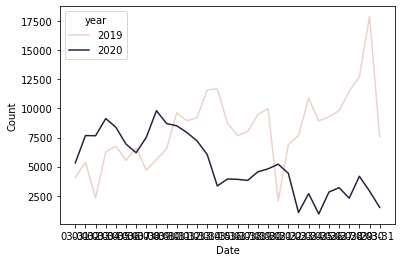

In [9]:
sns.lineplot(data = g1,x="Date",y="Count",hue="year")

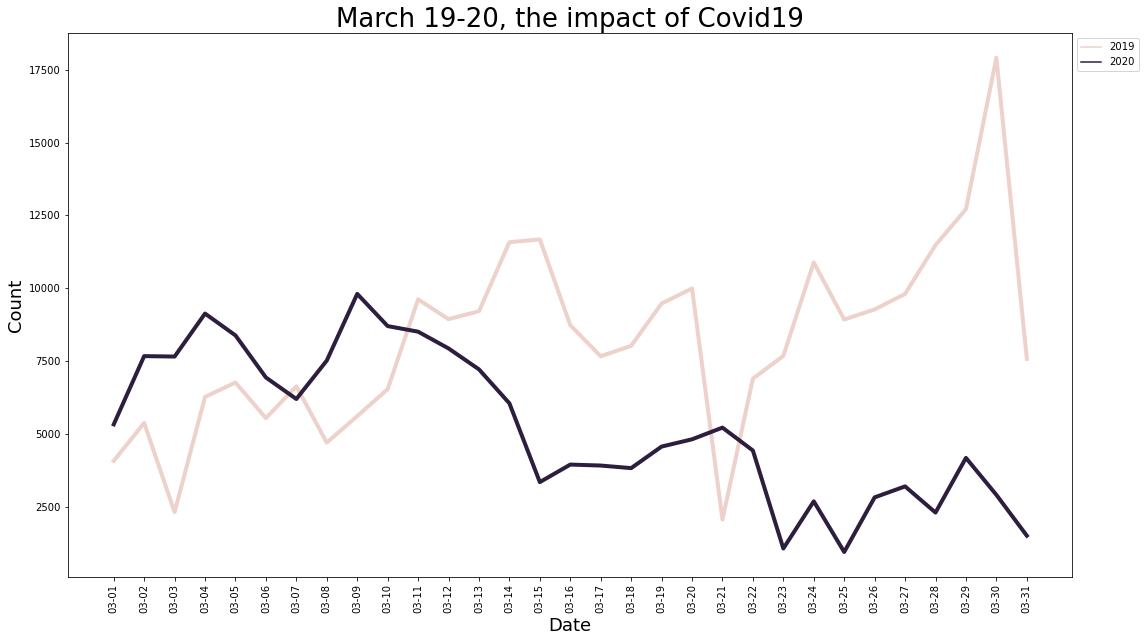

In [10]:
# Significant drop of rides - 
# 1st March 15 2020 Introduction of remote working
# 2nd drop when on 24th of March all "Non-essential" Dc Businesses ordered closed by Mayor

plt.figure(figsize = (18,10))
ax = sns.lineplot(x="Date",y='Count', data=g1, hue='year',linewidth=4)
ax.set_xticks(range(0,31))
matplotlib.style.use("seaborn-deep")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.xlabel("Date",fontsize=18)
plt.xticks(rotation="vertical")
plt.ylabel("Count",fontsize=18)
plt.title("March 19-20, the impact of Covid19", fontsize=26)
plt.savefig("Covid19.png",dpi=80)

In [17]:
# Significant drop of bookings between March of the 2 years (-40%)

g2 = march.groupby(["Year"]).size()
g2= g2.reset_index()
g2.columns=["Year", "Count"]
g2

,Year,Count
0,2019,253811
1,2020,162530
